# Data Exploration Notebook
This notebook explores the tweet data we have scraped. It examines different statistics (such as total number of tweets, number of tweets by party, etc) and visualizes some of these statistics.

### Import Necessary Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

### Load Data and Separate by Party

In [3]:
all_tweets_df = pd.read_csv("./raw_tweets.csv") 

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link,date,tweet,hashtags,link,urls
129244,Wyoming,Cynthia Lummis,Republican,0,SenLummis,https://twitter.com/SenLummis,2021-01-05 17:08:37,"Photo of the day: Lummis, like hummus https:/...",[],https://twitter.com/SenLummis/status/134657938...,['https://www.rollcall.com/2021/01/05/photo-of...
129245,Wyoming,Cynthia Lummis,Republican,0,SenLummis,https://twitter.com/SenLummis,2021-01-05 10:31:52,I’m about to join @RmonacoO on @KFBCRadio AM12...,[],https://twitter.com/SenLummis/status/134647953...,[]
129246,Wyoming,Cynthia Lummis,Republican,0,SenLummis,https://twitter.com/SenLummis,2021-01-04 15:24:47,I came back to Washington to address the issue...,['allwyomingallthetime'],https://twitter.com/SenLummis/status/134619086...,[]
129247,Wyoming,Cynthia Lummis,Republican,0,SenLummis,https://twitter.com/SenLummis,2021-01-04 11:39:42,"""Loomis"" is a common mispronunciation of my na...",[],https://twitter.com/SenLummis/status/134613421...,[]
129248,Wyoming,Cynthia Lummis,Republican,0,SenLummis,https://twitter.com/SenLummis,2021-01-03 12:24:14,I'm proud to represent the people of Wyoming i...,"['allwyomingallthetime', 'rideforthebrand']",https://twitter.com/SenLummis/status/134578303...,[]


In [4]:
republican_tweets_df = all_tweets_df[all_tweets_df["Party"] == "Republican"]
republican_tweets_df.head()

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link,date,tweet,hashtags,link,urls
0,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-10 10:54:50,"I look forward to working with the Consortium,...",[],https://twitter.com/SenShelby/status/136967813...,[]
1,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-10 10:54:13,Pleased to announce that an AL Consortium has ...,[],https://twitter.com/SenShelby/status/136967798...,['https://www.shelby.senate.gov/public/index.c...
2,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-09 17:06:05,Pleased with the progress at the Port of Mobil...,['alabama'],https://twitter.com/SenShelby/status/136940917...,[]
3,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-06 12:57:31,I am disappointed that we were blocked at ever...,[],https://twitter.com/SenShelby/status/136825946...,['https://www.shelby.senate.gov/public/index.c...
4,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-06 12:56:38,The bill does nothing to get kids back in clas...,[],https://twitter.com/SenShelby/status/136825924...,[]


In [12]:
democrat_tweets_df = all_tweets_df[(all_tweets_df["Party"] == "Democrat") | (all_tweets_df["Party"] == "Independent")]
democrat_tweets_df.head()

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link,date,tweet,hashtags,link,urls
3025,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema,2021-03-11 19:00:01,"During Long Term Care Administrators week, we’...",['ltcaweek21'],https://twitter.com/SenatorSinema/status/13701...,[]
3026,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema,2021-03-11 16:00:01,"We secured $8.5 billion for rural providers, $...",[],https://twitter.com/SenatorSinema/status/13701...,[]
3027,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema,2021-03-11 12:00:00,The National Kidney Foundation of Arizona (@NK...,['worldkidneyday'],https://twitter.com/SenatorSinema/status/13700...,['https://azkidney.org/']
3028,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema,2021-03-11 10:26:00,Our Safe Step Act will help Arizonans access t...,[],https://twitter.com/SenatorSinema/status/13700...,['http://sinema.senate.gov/sinema-backed-bipar...
3029,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema,2021-03-10 19:00:01,"On Women and Girls AIDS Awareness Day, we're s...",[],https://twitter.com/SenatorSinema/status/13698...,['https://www.cdc.gov/hiv/library/awareness/nw...


### Number of Senators by Each Party

In [31]:
senators_df = pd.read_csv("./senators_all.csv")
senators_df.head()

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link
0,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby
1,Alabama,Tommy Tuberville,Republican,0,SenTuberville,https://twitter.com/SenTuberville
2,Alaska,Lisa Murkowski,Republican,0,lisamurkowski,https://twitter.com/lisamurkowski
3,Alaska,Dan Sullivan,Republican,0,SenDanSullivan,https://twitter.com/SenDanSullivan
4,Arizona,Kyrsten Sinema,Democrat,0,SenatorSinema,https://twitter.com/SenatorSinema


In [32]:
counts = senators_df["Party"].value_counts()
counts

Republican     50
Democrat       48
Independent     2
Name: Party, dtype: int64

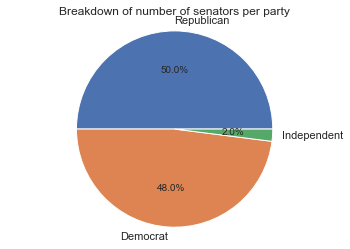

In [58]:
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Breakdown of number of senators per party")
plt.savefig("./Figures/senators_by_party_pie.png", format="png")
plt.show()

### Number of Tweets by Each Party

In [18]:
counts = all_tweets_df["Party"].value_counts()
counts

Democrat       71283
Republican     54670
Independent     3296
Name: Party, dtype: int64

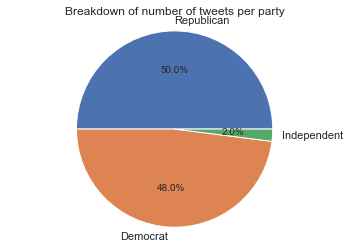

In [59]:
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Breakdown of number of tweets per party")
plt.savefig("./Figures/tweets_by_party_pie.png", format="png")
plt.show()

### Number of Tweets by Senator

In [27]:
pd.set_option("display.max_rows", 120)
senator_counts = all_tweets_df["Senator"].value_counts()
senator_counts

John Cornyn               4137
Ted Cruz                  3144
Ed Markey                 3066
Dick Durbin               2999
Chris Murphy              2845
Chuck Schumer             2762
Rick Scott                2592
Bernie Sanders            2589
Rob Portman               2588
Marsha Blackburn          2560
Chris Coons               2505
Patty Murray              2419
Sheldon Whitehouse        2395
Bob Menendez              2359
Jeanne Shaheen            2314
Richard Blumenthal        2259
Elizabeth Warren          2248
Marco Rubio               2205
Tammy Duckworth           2201
Jon Ossoff                2150
Catherine Cortez Masto    2114
Joni Ernst                2095
Jacky Rosen               2025
Bob Casey Jr.             2001
Maggie Hassan             1983
Lisa Murkowski            1975
Dianne Feinstein          1774
Michael Bennet            1765
Kyrsten Sinema            1716
Ron Wyden                 1712
Shelley Moore Capito      1700
Kevin Cramer              1697
Jeff Mer

In [29]:
# average number of tweets per senator
avg = sum(senator_counts.values) / len(senator_counts.values)
avg

1292.49

In [34]:
tweet = "Hello there how are you"
len(tweet.split(" "))

5

## Information About Word Count of Tweets


In [37]:
all_tweets_df["Word count"] = all_tweets_df["tweet"].apply(lambda x: len(x.split(" ")))
democrat_tweets_df = democrat_tweets_df.copy()
democrat_tweets_df["Word count"] = democrat_tweets_df["tweet"].apply(lambda x: len(x.split(" ")))
republican_tweets_df = republican_tweets_df.copy()
republican_tweets_df["Word count"] = republican_tweets_df["tweet"].apply(lambda x: len(x.split(" ")))

In [38]:
all_tweets_df.head()

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link,date,tweet,hashtags,link,urls,Word count
0,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-10 10:54:50,"I look forward to working with the Consortium,...",[],https://twitter.com/SenShelby/status/136967813...,[],34
1,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-10 10:54:13,Pleased to announce that an AL Consortium has ...,[],https://twitter.com/SenShelby/status/136967798...,['https://www.shelby.senate.gov/public/index.c...,42
2,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-09 17:06:05,Pleased with the progress at the Port of Mobil...,['alabama'],https://twitter.com/SenShelby/status/136940917...,[],36
3,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-06 12:57:31,I am disappointed that we were blocked at ever...,[],https://twitter.com/SenShelby/status/136825946...,['https://www.shelby.senate.gov/public/index.c...,33
4,Alabama,Richard Shelby,Republican,0,SenShelby,https://twitter.com/SenShelby,2021-03-06 12:56:38,The bill does nothing to get kids back in clas...,[],https://twitter.com/SenShelby/status/136825924...,[],27


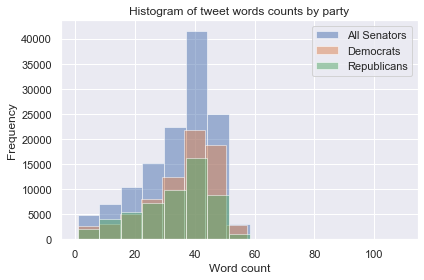

In [66]:
bins = 15
fig, ax = plt.subplots()
ax.hist(all_tweets_df["Word count"], bins, alpha = 0.5, label="All Senators")
ax.hist(democrat_tweets_df["Word count"], bins, alpha = 0.5, label="Democrats")
ax.hist(republican_tweets_df["Word count"], bins, alpha = 0.5, label="Republicans")
ax.legend(loc="upper right")
ax.set_xlabel("Word count")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of tweet words counts by party")
fig.tight_layout()
plt.savefig("./Figures/word_count_hist.png", format="png")
plt.show()

In [76]:
print("The max number of words in a tweet was ", max(all_tweets_df["Word count"]))

The max number of words in a tweet was  109


In [65]:
# Tweets with 109 words
df = all_tweets_df[all_tweets_df["Word count"] == 109]
df.head()

,State,Senator,Party,Multiple,Twitter Handle,Twitter Link,date,tweet,hashtags,link,urls,Word count
108785,Texas,John Cornyn,Republican,0,JohnCornyn,https://twitter.com/JohnCornyn,2020-05-27 11:54:10,Total dollars (out of $660 billion): ...,[],https://twitter.com/JohnCornyn/status/12656726...,[],109


In [73]:
# average word count for all senators
avg_all = sum(all_tweets_df["Word count"]) / len(all_tweets_df["Word count"])
print("The average word count for tweets by all senators was ", round(avg_all, 2))

The average word count for tweets by all senators was  34.69


In [74]:
# average word count for democrats
avg_democrat = sum(democrat_tweets_df["Word count"]) / len(democrat_tweets_df["Word count"])
print("The average word count for tweets by democrats was ", round(avg_democrat, 2))

The average word count for tweets by democrats was  35.82


In [75]:
# average word count for republicans
avg_republican = sum(republican_tweets_df["Word count"]) / len(republican_tweets_df["Word count"])
print("The average word count for tweets by republicans was ", round(avg_republican, 2))

The average word count for tweets by republicans was  33.14


## Information About Most Common Words

### Most Common Words For All Senators

### Most Common Words for Democrats

### Most Common Words for Republicans

## Word Clouds
Help from https://www.geeksforgeeks.org/generating-word-cloud-python/ and https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe

In [82]:
def make_word_cloud(df, save_name):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10, stopwords = stopwords).generate(" ".join(df["tweet"]))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig(save_name, format="png")
    plt.show()

### Word Cloud For All Senators

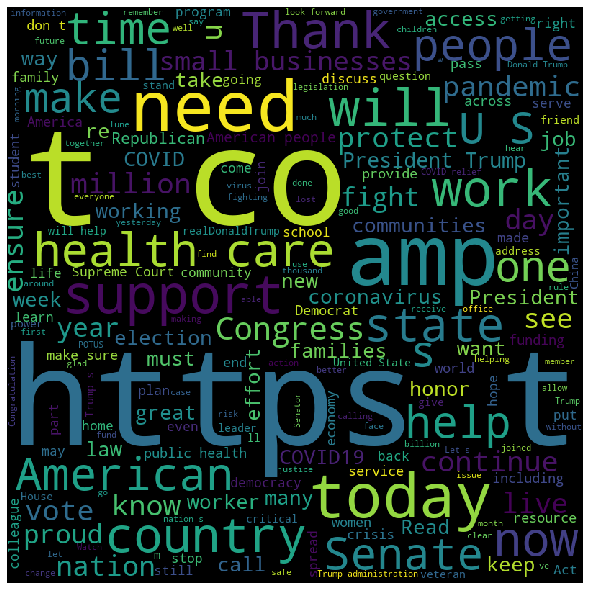

In [83]:
make_word_cloud(all_tweets_df, "./Figures/wordcloud_all.png")

### Word Cloud for Democrats

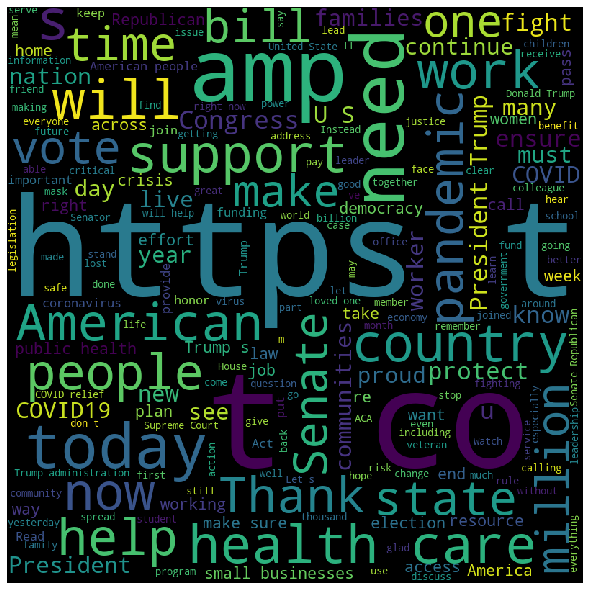

In [84]:
make_word_cloud(democrat_tweets_df, "./Figures/wordcloud_democrat.png")

### Word Cloud for Republicans

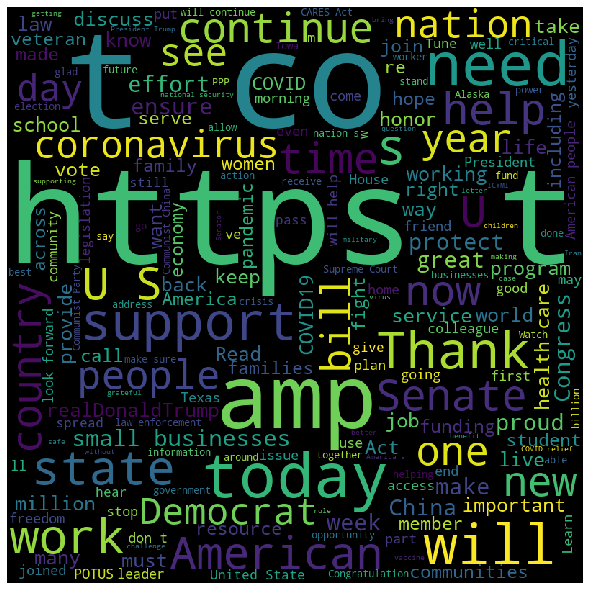

In [85]:
make_word_cloud(republican_tweets_df, "./Figures/wordcloud_republican.png")

## Information About Hashtags

### Average Number of Hashtags Per Tweet

### Most Frequent Hashtags for All Senators

### Most Frequent Hashtags for Democrats

### Most Frequent Hashtags for Republicans